In [34]:
from agent import EconomicAgent, CopAgent
from model import EconomicModel
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
model = EconomicModel(num_econ_agents=30, initial_cops=0, width=10, height = 10, election_frequency=20, interaction_memory=20)
for i in range(10000):
    model.step()

In [36]:
#the model data contains data collected at the model level
#mostly through counters that agents update when they do stuff
#this will show current model params or cumulative data
model_data = model.datacollector.get_model_vars_dataframe()

#agent data is collected at the agent level. Watch out because cops are still agents but don't have many params
#so NaN values are for cops, these can be dropped when calculating most stats
agent_data = model.datacollector.get_agent_vars_dataframe()


In [37]:
agent_data.dropna()#this drops cop data from the agent-centered stats
mean_df = agent_data.groupby('Step').mean().reset_index()
df = pd.merge(model_data, mean_df)


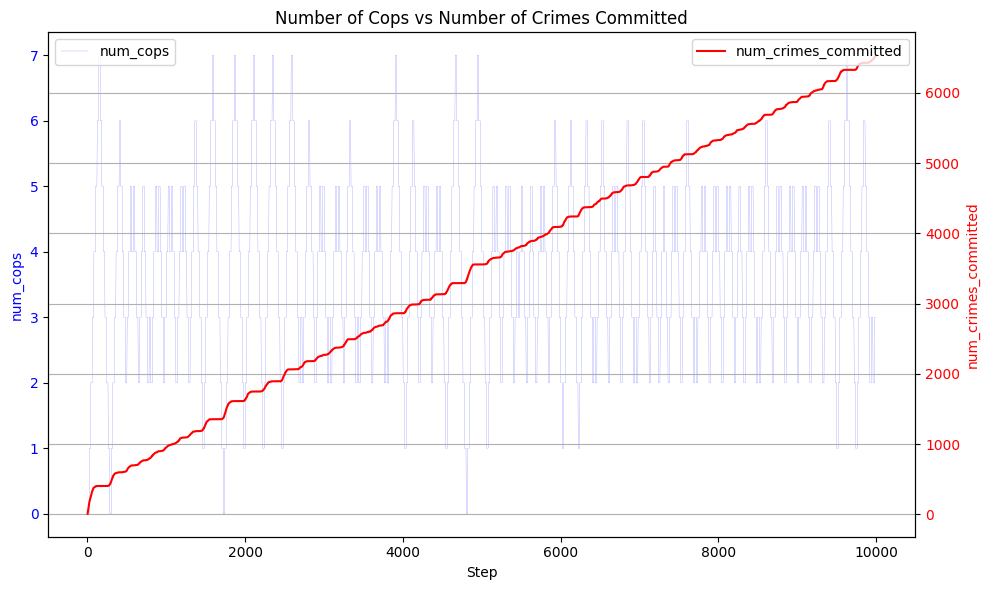

In [38]:
x = df['Step']  # Assuming 'Step' is your x-axis (you can replace it with the actual x-axis data)
y1 = df['num_cops']
y2 = df['num_crimes_committed']

# Plotting num_cops
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(x, y1, color='b', linewidth = 0.1, label='num_cops')
ax1.set_xlabel('Step')
ax1.set_ylabel('num_cops', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Creating second y-axis and plotting num_crimes_committed
ax2 = ax1.twinx()
ax2.plot(x, y2, color='r', label='num_crimes_committed')
ax2.set_ylabel('num_crimes_committed', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adding title and legend
plt.title('Number of Cops vs Number of Crimes Committed')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.grid(True)  # Optionally, add gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [39]:
df.columns

Index(['Step', 'num_cops', 'num_crimes_committed', 'num_arrests_made',
       'tax_rate', 'total_stolen', 'total_trade_income', 'wealth',
       'num_been_crimed'],
      dtype='object')

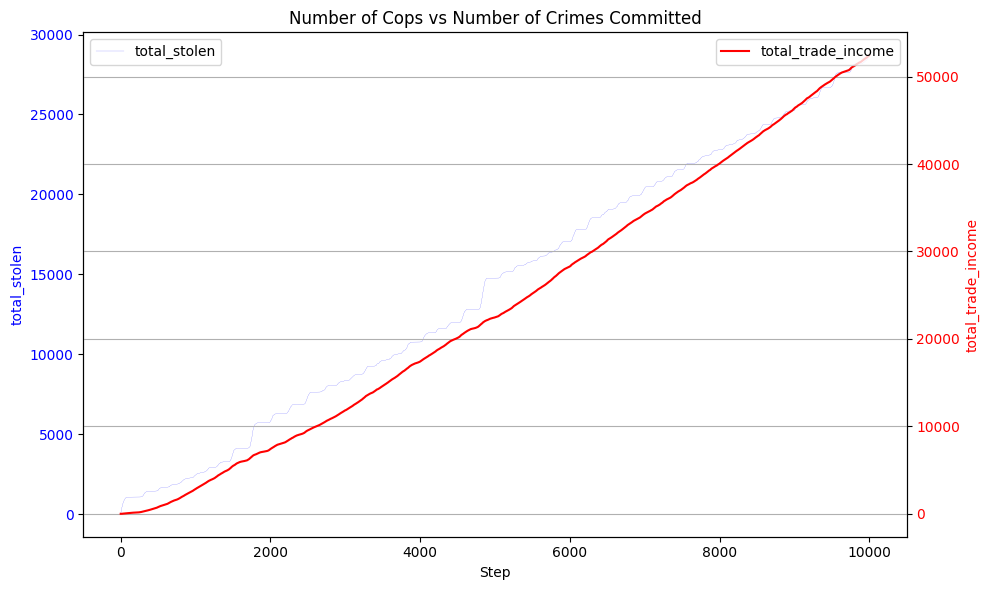

In [40]:
x = df['Step']  # Assuming 'Step' is your x-axis (you can replace it with the actual x-axis data)
y1 = df['total_stolen']
y2 = df['total_trade_income']

# Plotting num_cops
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(x, y1, color='b', linewidth = 1, label='total_stolen')
ax1.set_xlabel('Step')
ax1.set_ylabel('total_stolen', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Creating second y-axis and plotting num_crimes_committed
ax2 = ax1.twinx()
ax2.plot(x, y2, color='r', label='total_trade_income')
ax2.set_ylabel('total_trade_income', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adding title and legend
plt.title('Number of Cops vs Number of Crimes Committed')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.grid(True)  # Optionally, add gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()